# Libraries

In [1]:
import sklearn 
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from math import sin,cos,pi
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Describe the datasets

In [2]:
def Time_Formatx(x):
  # Formatting Time
    if pd.isna(x):
        return None
    if x == 2400:
        x = 0
    x = "{0:04d}".format(int(x))
    return datetime.time(int(x[0:2]), int(x[2:4]))

In [3]:
def stats(g):
    # Statistical Information for a Group
    return {'mean':g.mean(), 'variance':g.var(), 'count':g.count(), 'min':g.min(), 'max':g.max()}

In [4]:
# Reading the dataset
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

In [5]:
# Display the flights dataset
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237166,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,15.0,16.0,9.0,24.0,227.0,214.0,190.0,1826,534.0,15.0,546,549.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
5237167,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
5237168,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
5237169,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# Display the airlines dataset
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
# Display the airports dataset
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [8]:
# Statistics summary about the flights dataset
print(flights.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5237171.0  5.237171e+06  5.237171e+06  5.237171e+06   5.237171e+06   
mean      2015.0  6.524258e+00  1.570435e+01  3.927281e+00   2.173284e+03   
std          0.0  3.405032e+00  8.783391e+00  1.988986e+00   1.757155e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.231000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.237171e+06    5.159658e+06     5.159658e+06  5.157091e+06   
mean          1.329657e+03    1.335230e+03     9.366060e+00  1.607130e+01   
std           4.837711e+02    4.964392e+02     3.704860e+01  8.893392e+00  

In [9]:
# Statistics summary about the airlines dataset
print(airlines.describe())

       IATA_CODE                AIRLINE
count         14                     14
unique        14                     14
top           UA  United Air Lines Inc.
freq           1                      1


In [10]:
# Statistics summary about the airports dataset
print(airports.describe())

         LATITUDE   LONGITUDE
count  319.000000  319.000000
mean    38.981244  -98.378964
std      8.616736   21.523492
min     13.483450 -176.646030
25%     33.652040 -110.839385
50%     39.297610  -93.403070
75%     43.154675  -82.722995
max     71.285450  -64.798560


In [11]:
# 1. Discover column data types:
data_types = pd.DataFrame(flights.dtypes, columns=['Data Type'])
#2. Count missing data:
missing_data_counts = pd.DataFrame(flights.isnull().sum(), columns=['# of Missing Values'])
#3. Count present data:
present_data_counts = pd.DataFrame(flights.count(), columns=['# of Present Values'])
#4. Count unique data:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(flights.columns.values): unique_value_counts.loc[v] = [flights[v].nunique()]
#5. Create the report:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)
#6. Print the report:
print("\nData Quality Report")
data_quality_report


Data Quality Report


,Data Type,# of Present Values,# of Missing Values,Unique Values
YEAR,int64,5237171,0,1
MONTH,int64,5237171,0,12
DAY,int64,5237171,0,31
DAY_OF_WEEK,int64,5237171,0,7
AIRLINE,object,5237171,0,14
FLIGHT_NUMBER,int64,5237171,0,6950
TAIL_NUMBER,object,5223956,13215,4896
ORIGIN_AIRPORT,object,5237171,0,923
DESTINATION_AIRPORT,object,5237171,0,921
SCHEDULED_DEPARTURE,int64,5237171,0,1320


In [12]:
# 1. Discover column data types:
data_types = pd.DataFrame(airlines.dtypes, columns=['Data Type'])
#2. Count missing data:
missing_data_counts = pd.DataFrame(airlines.isnull().sum(), columns=['# of Missing Values'])
#3. Count present data:
present_data_counts = pd.DataFrame(airlines.count(), columns=['# of Present Values'])
#4. Count unique data:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(airlines.columns.values): unique_value_counts.loc[v] = [airlines[v].nunique()]
#5. Create the report:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)
#6. Print the report:
print("\nData Quality Report")
data_quality_report


Data Quality Report


,Data Type,# of Present Values,# of Missing Values,Unique Values
IATA_CODE,object,14,0,14
AIRLINE,object,14,0,14


In [13]:
# 1. Discover column data types:
data_types = pd.DataFrame(airports.dtypes, columns=['Data Type'])
#2. Count missing data:
missing_data_counts = pd.DataFrame(airports.isnull().sum(), columns=['# of Missing Values'])
#3. Count present data:
present_data_counts = pd.DataFrame(airports.count(), columns=['# of Present Values'])
#4. Count unique data:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(airports.columns.values): unique_value_counts.loc[v] = [airports[v].nunique()]
#5. Create the report:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)
#6. Print the report:
print("\nData Quality Report")
data_quality_report


Data Quality Report


,Data Type,# of Present Values,# of Missing Values,Unique Values
IATA_CODE,object,322,0,322
AIRPORT,object,322,0,322
CITY,object,322,0,308
STATE,object,322,0,54
COUNTRY,object,322,0,1
LATITUDE,float64,319,3,319
LONGITUDE,float64,319,3,319


In [14]:
def impute_or_drop(dataframe, columns_to_impute, strategy='mean', drop=False):
    if drop:
        # Drop rows with any null values in specified columns
        dataframe = dataframe.dropna(subset=columns_to_impute)
    else:
        for column in columns_to_impute:
            if dataframe[column].dtype.kind in 'iufc':  # Check if the column is numeric
                if strategy == 'mean':
                    fill_value = dataframe[column].mean()
                elif strategy == 'median':
                    fill_value = dataframe[column].median()
                elif strategy == 'mode':
                    fill_value = dataframe[column].mode()[0]
                dataframe[column].fillna(fill_value, inplace=True)
            else:
                # For non-numeric columns, fill with mode or a placeholder
                fill_value = dataframe[column].mode()[0] if strategy == 'mode' else 'Unknown'
                dataframe[column].fillna(fill_value, inplace=True)
    return dataframe

In [15]:
Flights = impute_or_drop(flights, ['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], strategy='mean', drop=False)

# Explarotary Data Analysis

In [16]:
def dataOverview(Airlines, Airports, Flights):

    # YEAR, MONTH, DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT, and DESTINATION_AIRPORT
    # Cancellation Reasons

    cancelled = Flights['CANCELLATION_REASON']
    cancelled.dropna(inplace=True)
    cancelledCount = dict(cancelled.value_counts())
    labels = ['Weather','Airline','National Air System','Security']
    sizes = cancelledCount.values()

    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(sizes, labels=labels, pctdistance=1.25, labeldistance=1.45, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 20})
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


    # Flights on Different Days of Week
    daysOfWeek = Flights['DAY_OF_WEEK']
    dayCounts = dict(daysOfWeek.value_counts())
    dayFreq = {}
    for day in sorted(dayCounts):
        dayFreq[day] = dayCounts[day]

    plt.figure(figsize=(12,8))
    flightFreq = list(dayFreq.values())
    flightFreq.append(dayFreq[1]) # add monday
    flightFreq.append(dayFreq[2]) # add tuesday
    days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon.','Tue...']
    plt.plot(days,flightFreq)
    plt.xlabel("Days of week", fontsize=16)
    plt.ylabel("No of flights", fontsize=16)
    plt.title("No of flights on days of week", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()


    # Flights in Different Months

    months = Flights['MONTH']
    monthCounts = dict(months.value_counts())
    monthFreq = {}
    for month in sorted(monthCounts):
        monthFreq[month] = monthCounts[month]

    plt.figure(figsize=(12,8))
    flightFreq = list(monthFreq.values())
    monthsArr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.plot(monthsArr, flightFreq)
    plt.xlabel("Months", fontsize=16)
    plt.ylabel("No of flights", fontsize=16)
    plt.title("No of flights on different months", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()


    # Delay Threshold

    ttl = Flights.shape[0]
    threshold = 3
    delayLessThanThreshold = Flights[Flights['ARRIVAL_DELAY'] <= threshold].shape[0] / ttl
    print(delayLessThanThreshold)

def exploratoryDataAnalysis(df):

    # # Overall analysis

    # report = sv.analyze(df)
    # report.show_html("EDA.html")


    # Air Traffic Share of Airlines

     plt.subplots(figsize=(15,20))
     plt.pie(df['AIRLINE'].value_counts(),labels=df['AIRLINE_NAME'].unique(),autopct='%1.0f%%',textprops={'fontsize': 20})
     plt.show()


    # Calculating Data Statistics

     Origin_Stats = df['ARRIVAL_DELAY'].groupby(df['ORIGIN']).apply(stats).unstack().sort_values('count',ascending=False)
     Destination_Stats = df['ARRIVAL_DELAY'].groupby(df['DESTINATION']).apply(stats).unstack().sort_values('count',ascending=False)
     Airline_Stats = df['ARRIVAL_DELAY'].groupby(df['AIRLINE']).apply(stats).unstack().sort_values('mean')
     print(Airline_Stats)


    # Airline Delays on Different Days of Week ********* changes

     Days = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
     Airline_Day_Stats = pd.DataFrame()
     for a in df['AIRLINE'].unique():
         x = df[df['AIRLINE']==a]
         t = x['ARRIVAL_DELAY'].groupby(df['DAY']).mean()
         Airline_Day_Stats[a]=t
     Airline_Day_Stats.dropna(inplace=True)
     print(Airline_Day_Stats)

     sns.set(context="paper")
     plt.subplots(figsize=(10,8))
     plt.title("Mean Delay for Airline Vs. Day of Week")
     sns.heatmap(Airline_Day_Stats, linewidths=0.01, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256),robust=True,yticklabels=Days)
     plt.show()


    # Busiest airports and Airlines

     Airports = df['DESTINATION_CITY'].groupby(df["DESTINATION_CITY"]).count().sort_values(ascending=False).iloc[:11].keys().tolist()
     map = df[['AIRLINE_NAME','DESTINATION_CITY','ARRIVAL_DELAY']]

     frames = list()
     for x in Airports:
         frames.append(map.loc[map["DESTINATION_CITY"] == x])
     map = pd.concat(frames)

     airline_city_delay = pd.DataFrame()
     for airlines in map["AIRLINE_NAME"].unique():
         t = map.loc[map["AIRLINE_NAME"] == airlines]
         temp = t["ARRIVAL_DELAY"].groupby(t["DESTINATION_CITY"]).mean()
         airline_city_delay[airlines] = temp

     sns.set(context="paper")
     plt.subplots(figsize=(10,8))
     plt.title("Mean Delay for Airline Vs. Destination Airports")
     sns.heatmap(airline_city_delay, linewidths=0.01, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256),robust=True,yticklabels=Airports)
     plt.show()


    # Distance and Delay

     map = df[["DISTANCE","ARRIVAL_DELAY","AIRLINE_NAME"]].copy()
     interval = list()
     for i in range(0,5000,100):
         interval.append(i)

     map["DISTANCE_INTERVAL"] = pd.cut(x = map["DISTANCE"], bins = interval)
     map["DISTANCE_MID"] = map["DISTANCE_INTERVAL"].apply(lambda x : x.mid)
     newMap = map["ARRIVAL_DELAY"].groupby(map["DISTANCE_MID"]).mean().to_frame()
     newMap.dropna(inplace=True)
     newMap.plot.line(title = "Distance vs Delay graph (Bucket Size:100)")
     plt.show()


    # Distribution of Arrival Delay

     sns.displot(df['ARRIVAL_DELAY'], bins = [i for i in range(-50,100)])
     plt.show()

def preprocess(analysis=False):
    # Load data
    Airlines = pd.read_csv('airlines.csv')
    Airports = pd.read_csv('airports.csv')
    Flights = pd.read_csv('flights.csv')

    if analysis:
        dataOverview(Airlines, Airports, Flights)  # Assuming dataOverview is a function defined elsewhere

    # Dropping rows with NaN values and selecting data for January
    Flights = Flights.iloc[:,:23]
    Flights.dropna(inplace=True)
    Flights = Flights[Flights["MONTH"] == 1]
    Flights.reset_index(drop=True, inplace=True)

    # Collecting Names of Airlines and Airports
    Airline_Names = {Airlines["IATA_CODE"][i]: Airlines["AIRLINE"][i] for i in range(len(Airlines))}
    Airport_Names = {Airports["IATA_CODE"][i]: Airports["AIRPORT"][i] for i in range(len(Airports))}
    City_Names = {Airports["IATA_CODE"][i]: Airports["CITY"][i] for i in range(len(Airports))}

    # Merging Datasets & Selecting relevant columns
    df = pd.DataFrame()
    df['DATE'] = pd.to_datetime(Flights[['YEAR', 'MONTH', 'DAY']])
    df['DAY'] = Flights["DAY_OF_WEEK"]
    df['AIRLINE'] = Flights["AIRLINE"]
    df['FLIGHT_NUMBER'] = Flights['FLIGHT_NUMBER']
    df['TAIL_NUMBER'] = Flights['TAIL_NUMBER']
    df['ORIGIN'] = Flights['ORIGIN_AIRPORT']
    df['DESTINATION'] = Flights['DESTINATION_AIRPORT']
    df['DISTANCE'] = Flights['DISTANCE']
    df['SCHEDULED_DEPARTURE'] = Flights['SCHEDULED_DEPARTURE'].apply(Time_Formatx)
    df['SCHEDULED_ARRIVAL'] = Flights['SCHEDULED_ARRIVAL'].apply(Time_Formatx)
    df['TAXI_OUT'] = Flights['TAXI_OUT']
    df['DEPARTURE_DELAY'] = Flights['DEPARTURE_DELAY']
    df['ARRIVAL_DELAY'] = Flights['ARRIVAL_DELAY']
    df = df[df.ARRIVAL_DELAY < 500]  # Filter to manage extreme values

    if analysis:
        exploratoryDataAnalysis(df)  # Assuming exploratoryDataAnalysis is a function defined elsewhere

    # Handling Categorical Variables with Label Encoding
    le = LabelEncoder()
    df['AIRLINE'] = le.fit_transform(df['AIRLINE'])
    df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
    df['DESTINATION'] = le.fit_transform(df['DESTINATION'])
    df['TAIL_NUMBER_ENCODED'] = le.fit_transform(df['TAIL_NUMBER'])

    # Selecting Features for Model
    X = df[['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER_ENCODED', 'ORIGIN', 'DESTINATION', 'DISTANCE', 'TAXI_OUT', 'DEPARTURE_DELAY']]
    Y = (df['ARRIVAL_DELAY'] > 15).astype(int)  # Binary classification, delay > 15 min

    # Splitting into Train, Validation, and Test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

    # Standard Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    if analysis:
        print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
        print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")

    return X_train, y_train, X_val, y_val, X_test, y_test


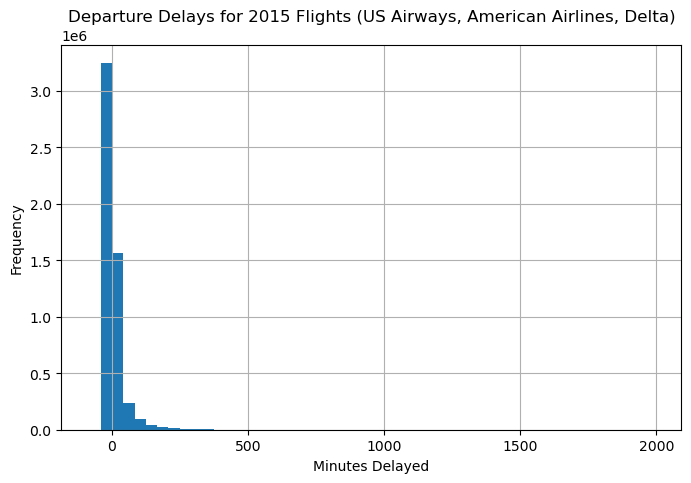

In [17]:
# How frequent is a flight delayed due to departure delay?
flights.hist(column= ['DEPARTURE_DELAY'], figsize = (8, 5), bins=50);
plt.title("Departure Delays for 2015 Flights (US Airways, American Airlines, Delta)")
plt.xlabel("Minutes Delayed")
plt.ylabel("Frequency")
plt.show()

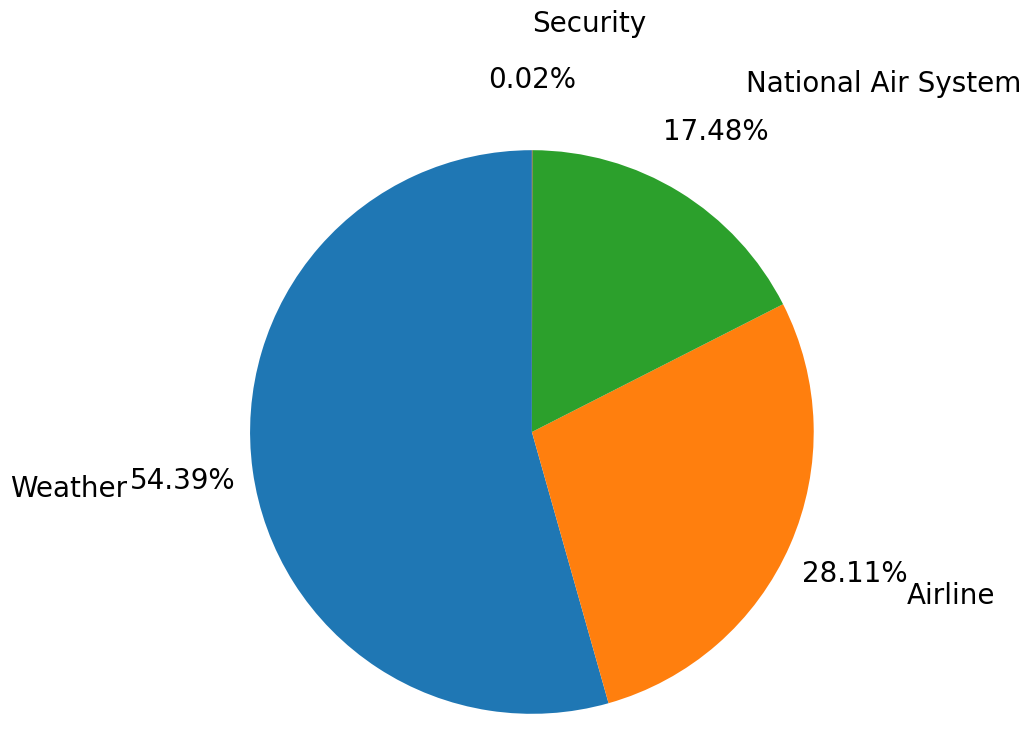

In [18]:
# Cancellation Reasons percentages
cancelled = flights['CANCELLATION_REASON']
cancelled.dropna(inplace=True)
cancelledCount = dict(cancelled.value_counts())
labels = ['Weather','Airline','National Air System','Security']
sizes = cancelledCount.values()

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, pctdistance=1.25, labeldistance=1.45, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 20})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

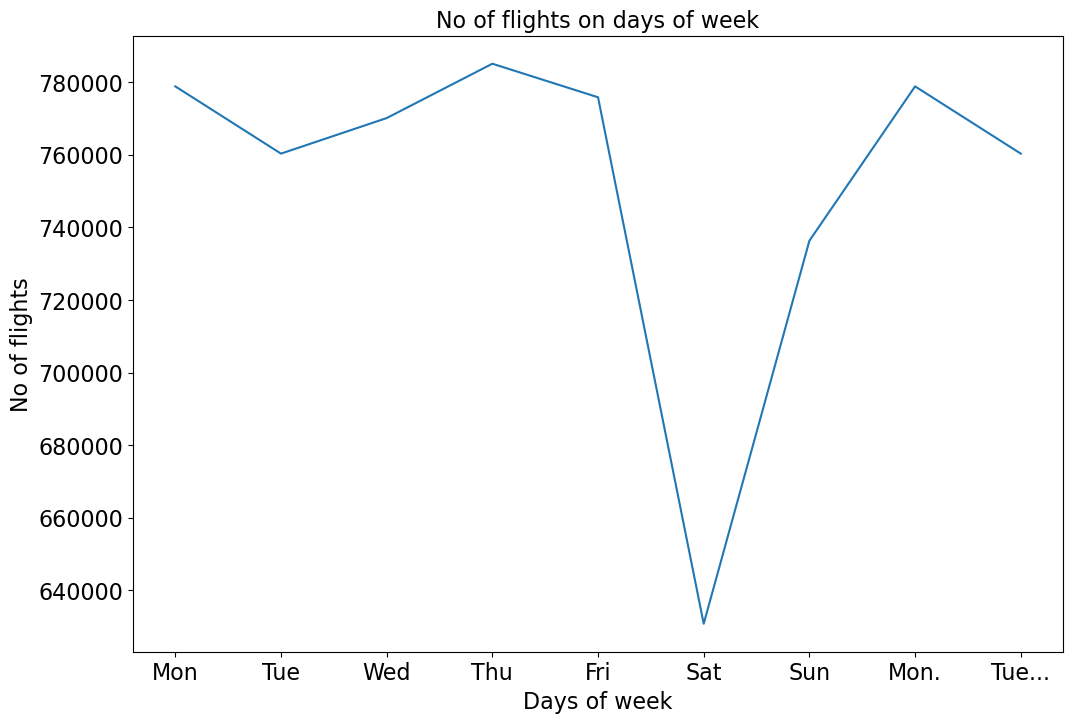

In [19]:
# The frequency of taking flights in different days of the week
daysOfWeek = flights['DAY_OF_WEEK']
dayCounts = dict(daysOfWeek.value_counts())
dayFreq = {}
for day in sorted(dayCounts): dayFreq[day] = dayCounts[day]

plt.figure(figsize=(12,8))
flightFreq = list(dayFreq.values())
flightFreq.append(dayFreq[1]) # add monday
flightFreq.append(dayFreq[2]) # add tuesday
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon.','Tue...']
plt.plot(days,flightFreq)
plt.xlabel("Days of week", fontsize=16)
plt.ylabel("No of flights", fontsize=16)
plt.title("No of flights on days of week", fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

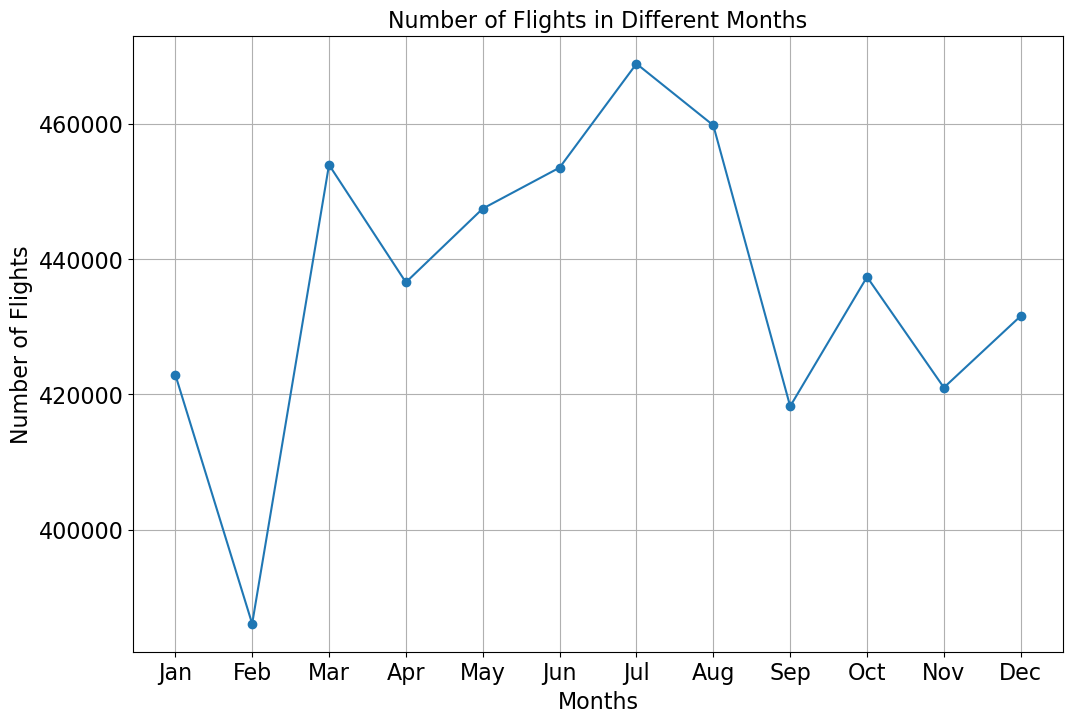

In [20]:
months = flights['MONTH']
monthCounts = months.value_counts()

# Initialize monthFreq with zeros for all months
monthFreq = {month: 0 for month in range(1, 13)}  # Use month numbers 1 through 12

# Update monthFreq with actual counts
for month, count in monthCounts.items():
    monthFreq[month] = count

# Prepare data for plotting
flightFreq = list(monthFreq.values())  # This ensures you have counts for all months in order
monthsArr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthsArr, flightFreq, marker='o')  # Added marker for visual aid
plt.xlabel("Months", fontsize=16)
plt.ylabel("Number of Flights", fontsize=16)
plt.title("Number of Flights in Different Months", fontsize=16)
plt.tick_params(labelsize=16)
plt.grid(True)  # Optional: Adds a grid for easier reading
plt.show()

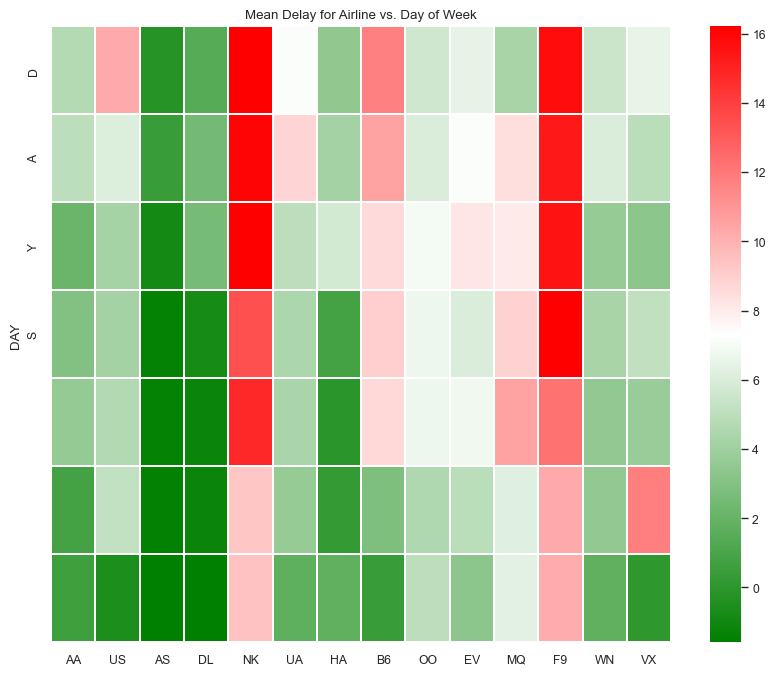

In [21]:
flights['ARRIVAL_DELAY'] = pd.to_numeric(flights['ARRIVAL_DELAY'], errors='coerce')  # Convert delays to numeric, setting errors to NaN

Airline_Day_Stats = pd.DataFrame()

# Calculate mean arrival delay for each airline by day of week
for airline in flights['AIRLINE'].unique():
    subset = flights[flights['AIRLINE'] == airline]
    means = subset.groupby('DAY')['ARRIVAL_DELAY'].mean()  # Ensure DAY is the correct column for days of the week
    Airline_Day_Stats[airline] = means

# Reindex the DataFrame to include all days and replace NaNs with a filler, e.g., 0 or an average value
Airline_Day_Stats = Airline_Day_Stats.reindex(range(1, 8)).fillna(0)  # Assuming 'DAY' values are 1-7 representing Monday-Sunday

# Set up the plotting
sns.set(context="paper")
plt.subplots(figsize=(10, 8))
plt.title("Mean Delay for Airline vs. Day of Week")

# Custom color map from green (low delay) to red (high delay)
cmap = LinearSegmentedColormap.from_list('rg', ["green", "white", "red"], N=256)
sns.heatmap(Airline_Day_Stats, linewidths=0.01, cmap=cmap, robust=True, yticklabels='DAYS')
plt.show()

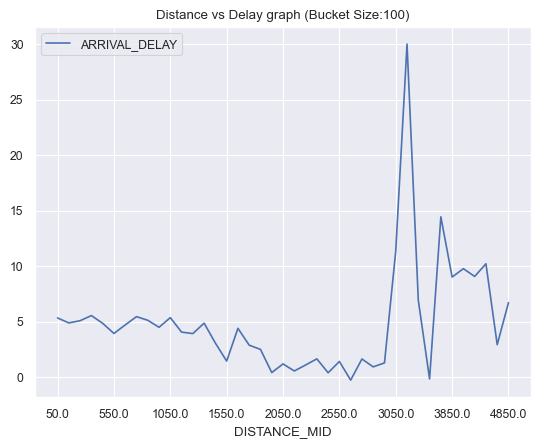

In [22]:
# Distance and Delay

map = flights[["DISTANCE","ARRIVAL_DELAY","AIRLINE"]].copy()
interval = list()
for i in range(0,5000,100):interval.append(i)

map["DISTANCE_INTERVAL"] = pd.cut(x = map["DISTANCE"], bins = interval)
map["DISTANCE_MID"] = map["DISTANCE_INTERVAL"].apply(lambda x : x.mid)
newMap = map["ARRIVAL_DELAY"].groupby(map["DISTANCE_MID"]).mean().to_frame()
newMap.dropna(inplace=True)
newMap.plot.line(title = "Distance vs Delay graph (Bucket Size:100)")
plt.show()

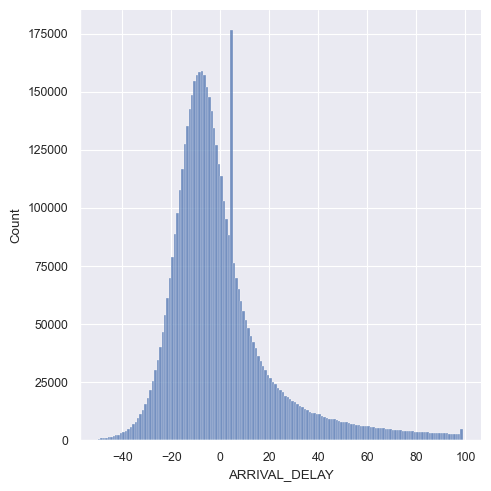

In [23]:
# Distribution of Arrival Delay
sns.displot(flights['ARRIVAL_DELAY'], bins = [i for i in range(-50,100)])
plt.show()

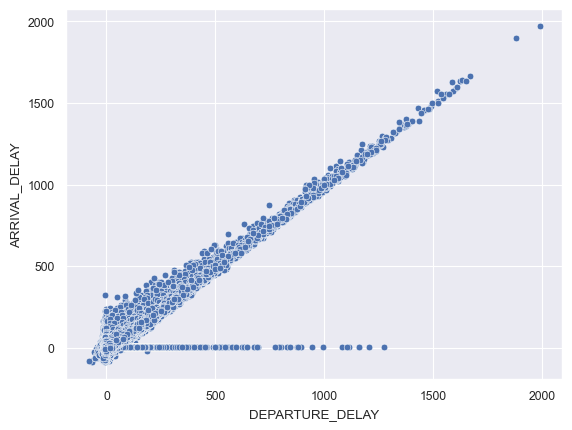

In [24]:
# plot relationship Actual DEPARTUR time & Actual ARRIVAL time
ax = sns.scatterplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data=flights)

Text(0.5, 1.0, 'Security Delayed Distribution Per Airline')

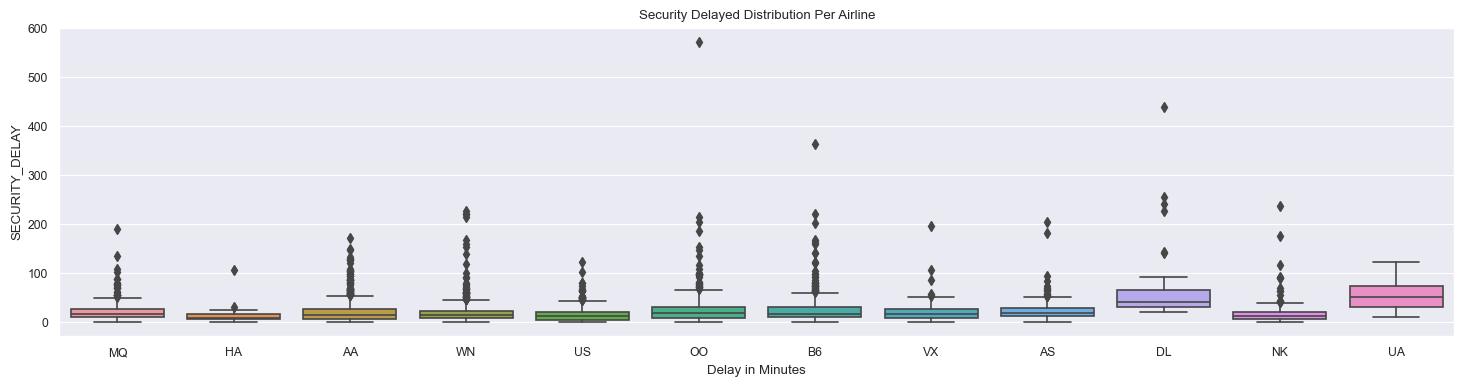

In [25]:
# Security Delay per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.SECURITY_DELAY>0][['SECURITY_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='SECURITY_DELAY', data=box_data)    # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Security Delayed Distribution Per Airline')

Text(0.5, 1.0, 'Air Sysytem Delayed Distribution Per Airline')

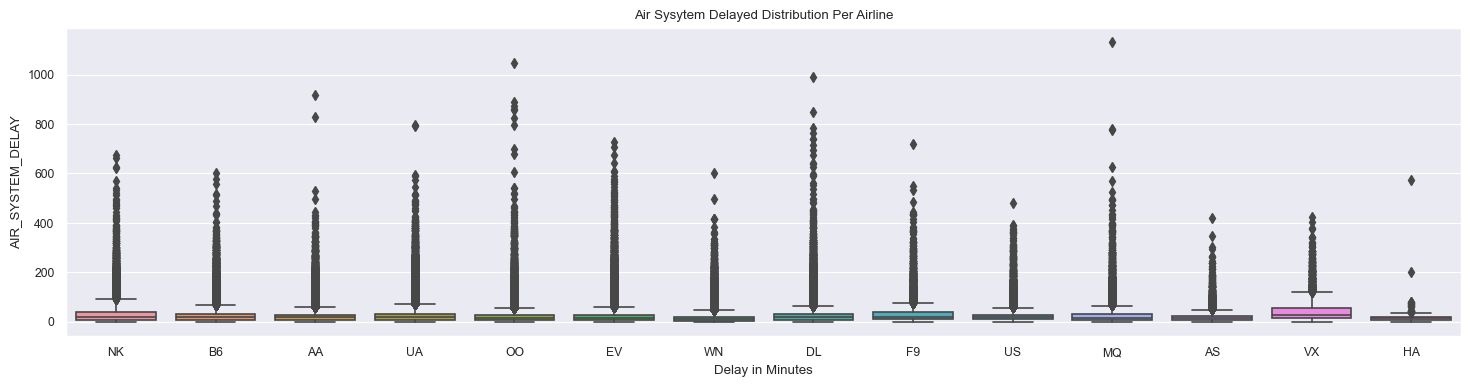

In [26]:
# AIR_SYSTEM_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.AIR_SYSTEM_DELAY>0][['AIR_SYSTEM_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='AIR_SYSTEM_DELAY', data=box_data)    # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Air Sysytem Delayed Distribution Per Airline')

Text(0.5, 1.0, 'Airline Delay Distribution Per Airline')

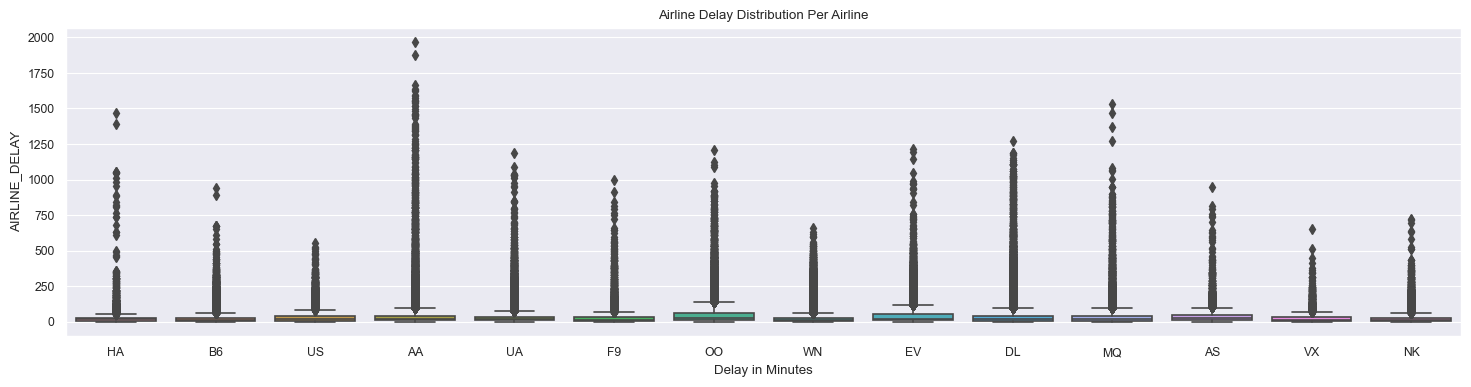

In [27]:
# AIRLINE_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.AIRLINE_DELAY>0][['AIRLINE_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='AIRLINE_DELAY', data=box_data)    # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Airline Delay Distribution Per Airline')

Text(0.5, 1.0, 'Late aircraft Delay Distribution Per Airline')

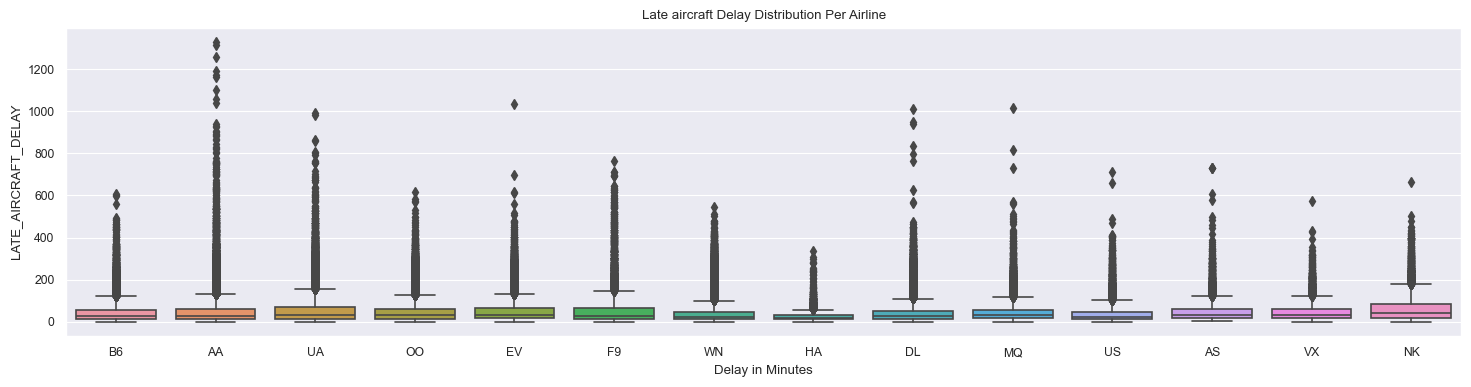

In [28]:
# LATE_AIRCRAFT_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.LATE_AIRCRAFT_DELAY>0][['LATE_AIRCRAFT_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='LATE_AIRCRAFT_DELAY', data=box_data)    # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Late aircraft Delay Distribution Per Airline')

Text(0.5, 1.0, 'Weather Delay Distribution Per Airline')

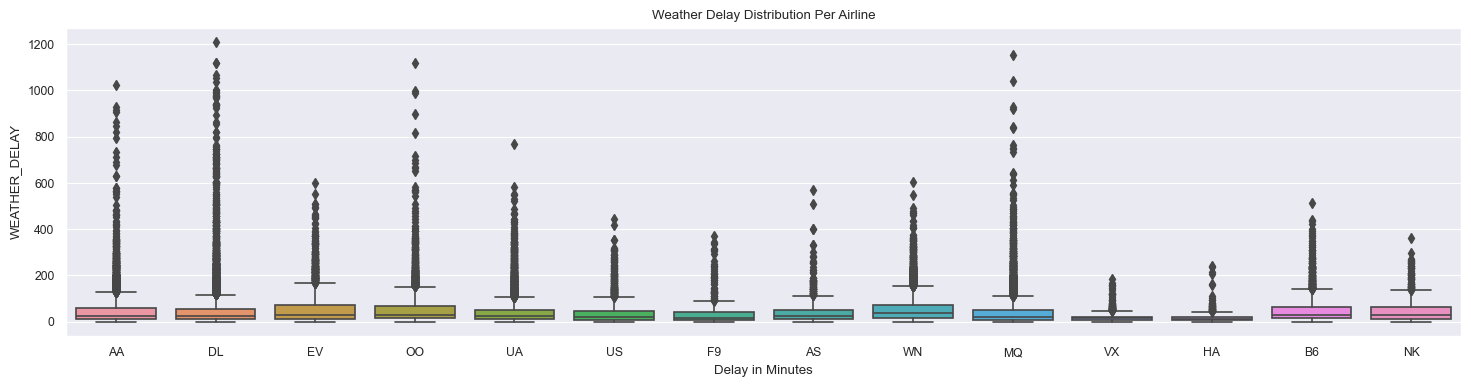

In [29]:
# WEATHER_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.WEATHER_DELAY>0][['WEATHER_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='WEATHER_DELAY', data=box_data)    # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Weather Delay Distribution Per Airline')

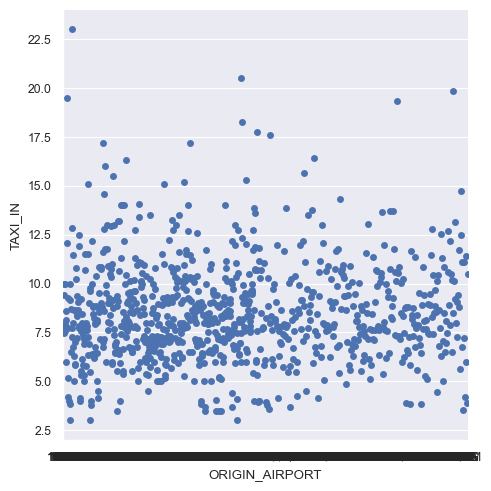

In [30]:
# Ploting average taxi_in per origion airport
TaxiInAverage = flights.groupby('ORIGIN_AIRPORT')['TAXI_IN'].mean().reset_index()
sns.catplot(x ='ORIGIN_AIRPORT', y='TAXI_IN', data=TaxiInAverage) ;

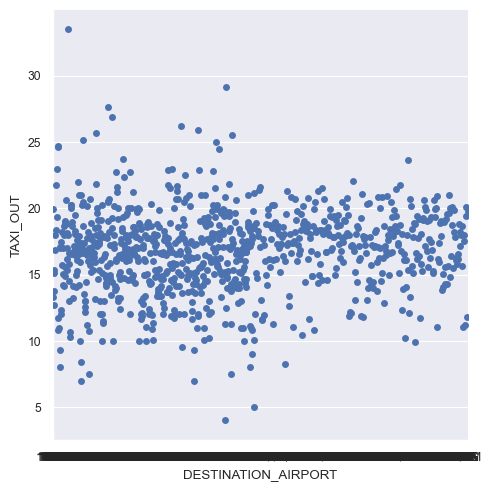

In [31]:
# Calculating average taxi_out per destination airport
TaxiOutAverage=flights.groupby('DESTINATION_AIRPORT')[['TAXI_OUT']].mean().reset_index()
# Ploting average taxi_out per destination airport
sns.catplot(x ='DESTINATION_AIRPORT', y='TAXI_OUT', data=TaxiOutAverage)

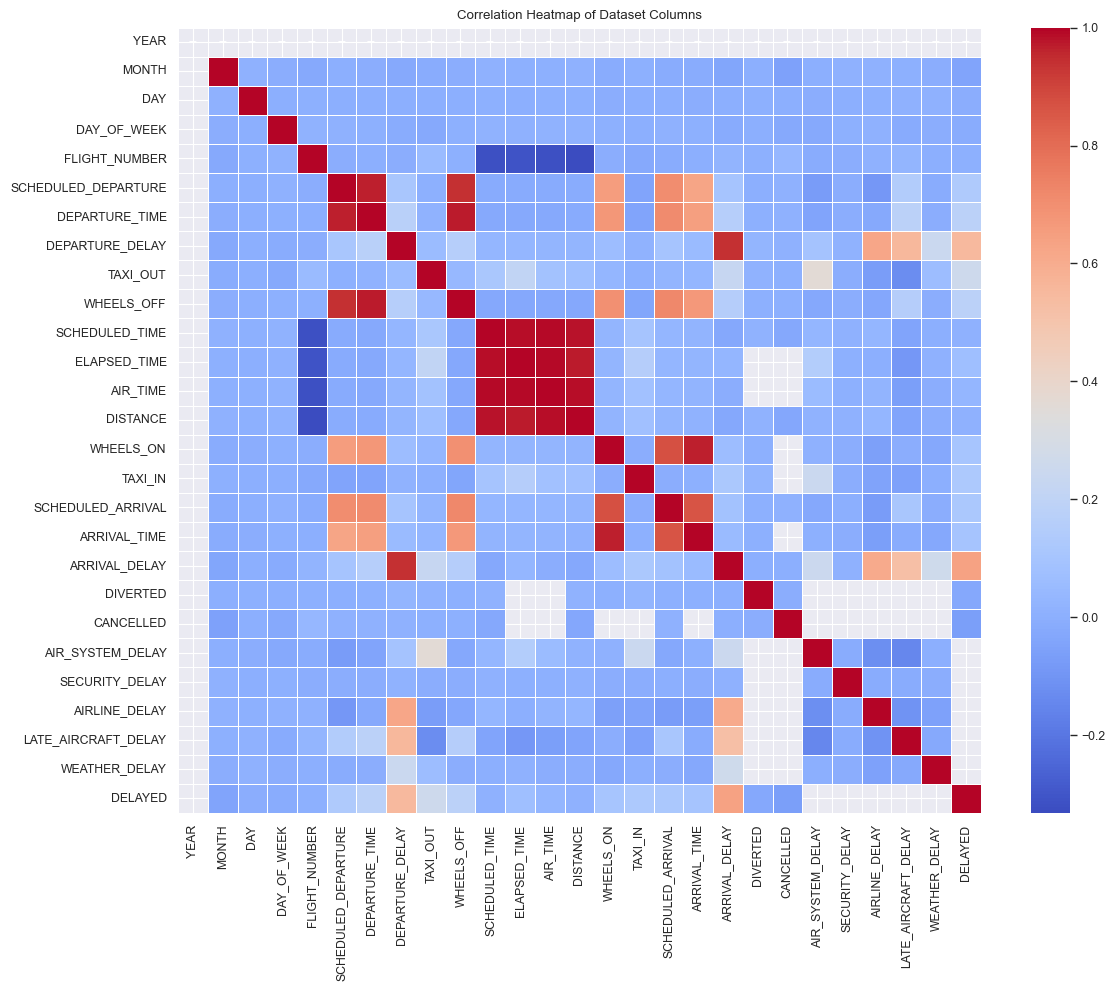

In [32]:
# Select only numeric columns
numeric_columns = flights.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Dataset Columns')
plt.tight_layout()
plt.show()

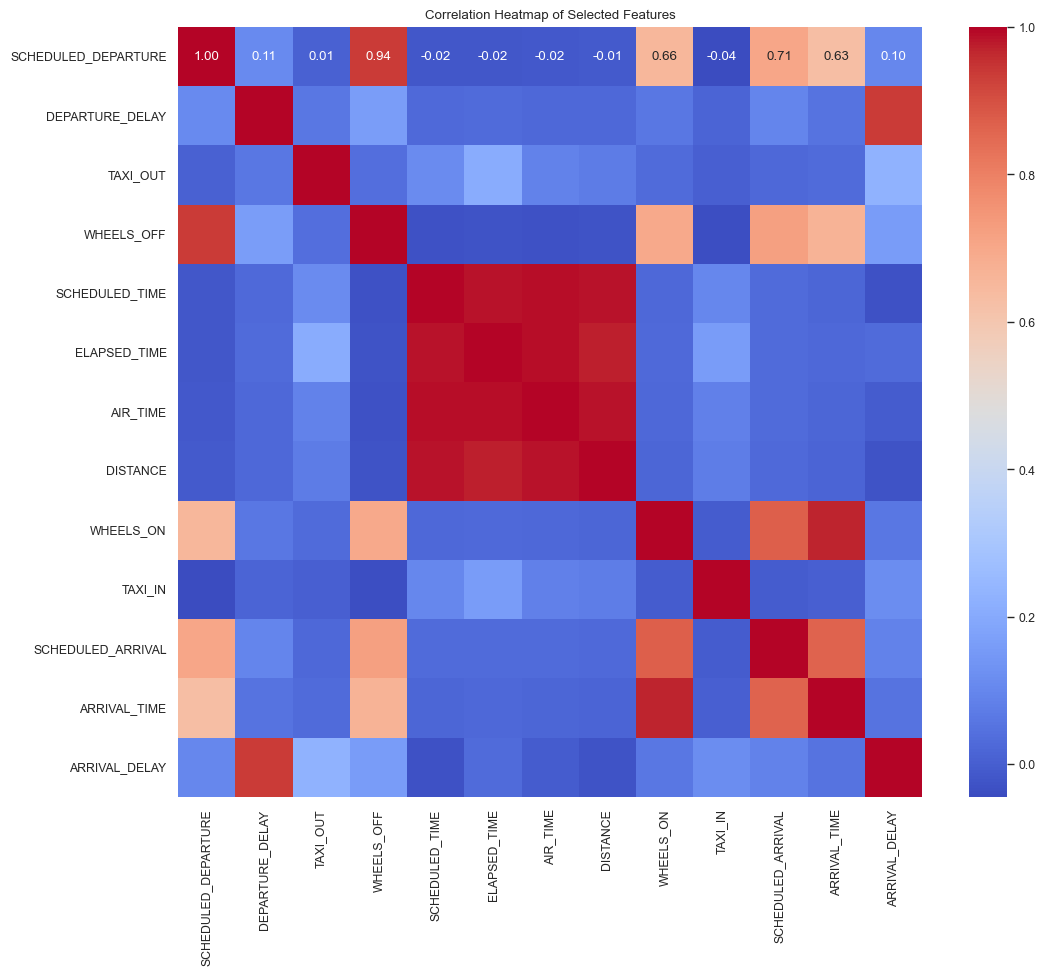

In [33]:
# Select features for the heatmap
selected_features = ['SCHEDULED_DEPARTURE','DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY']

# Create a correlation matrix
correlation_matrix = flights[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

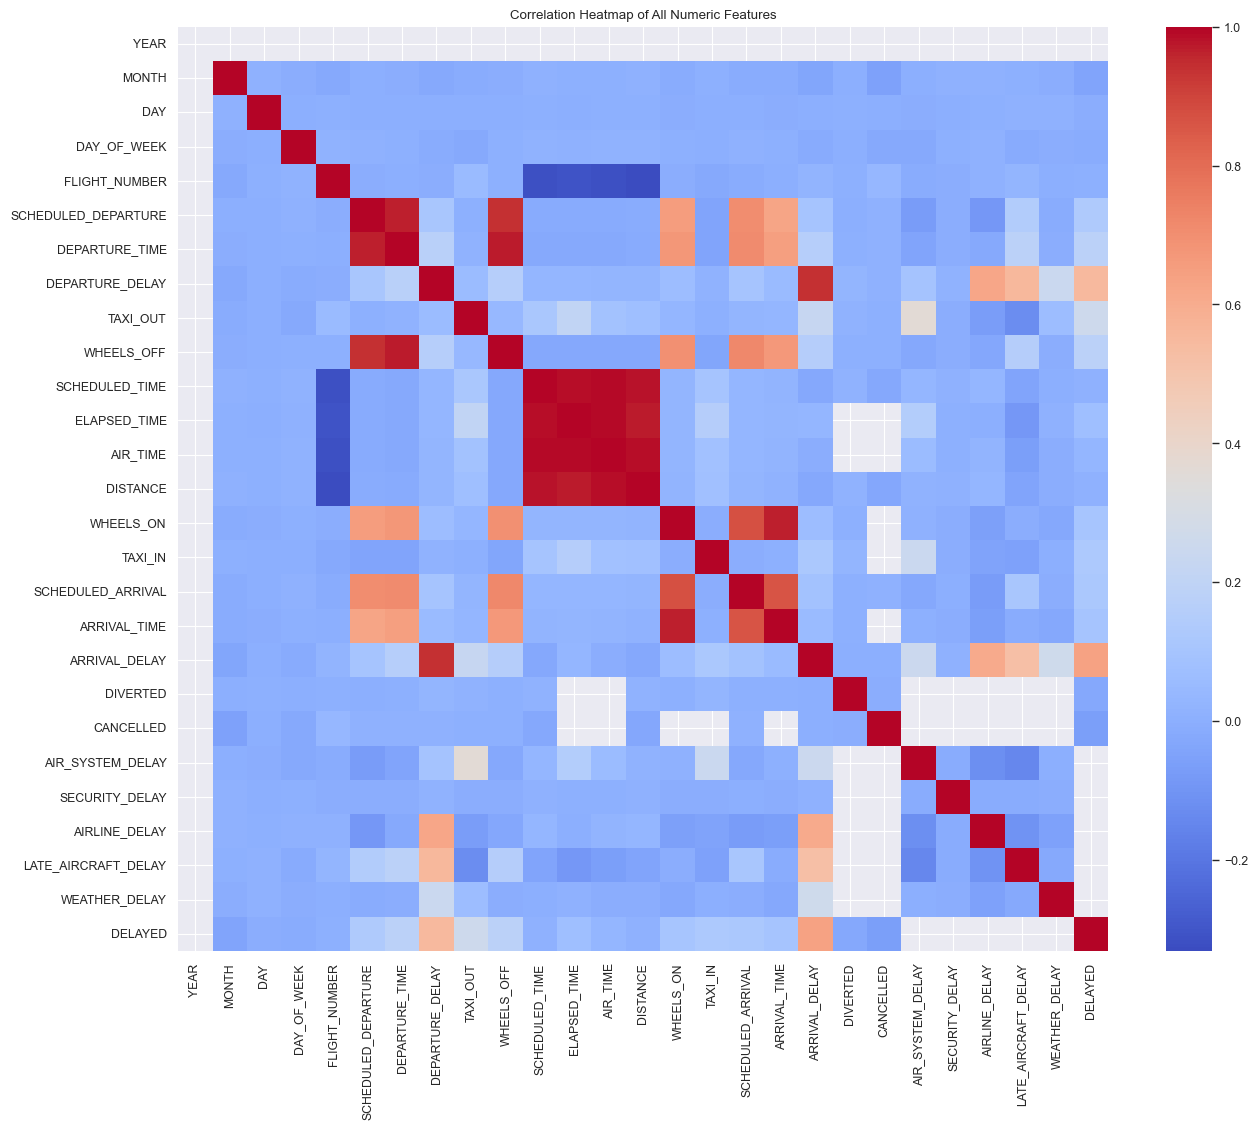

In [34]:
# Drop non-numeric columns
numeric_df = flights.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Numeric Features')
plt.show()

# Model

In [40]:
def lstm():
    # Load and preprocess the data
    X_train, y_train, X_val, y_val, X_test, y_test = preprocess()
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    # Build the model
    model = Sequential([
        LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(units=128, return_sequences=True),
        Dropout(0.2),
        LSTM(units=64, return_sequences=True),
        Dropout(0.2),
        LSTM(units=32, return_sequences=False),
        Dropout(0.2),
        Dense(units=16, activation='sigmoid'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')
    ])

    # Compile the model
    optimizer_ = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer_, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Save the model
    model.save('lstm_model.h5')

In [41]:
def load_and_predict():
    # Load the model
    loaded_model = load_model('lstm_model.h5')
    
    # Preprocess the data again or load existing test data
    X_train, y_train, X_val, y_val, X_test, y_test = preprocess()
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    # Make predictions
    predictions = loaded_model.predict(X_test)
    
    # Define a threshold
    threshold = 0.5  # You can adjust this threshold based on your preference

    # Classify flights based on the threshold
    predictions_binary = ['delayed' if prob >= threshold else 'not delayed' for prob in predictions]

    # Print the classification results
    for i, prediction in enumerate(predictions_binary):
        print(f"Flight {i + 1}: {prediction}")

In [42]:
lstm()

Epoch 1/10
8995/8995 [==============================] - 62s 6ms/step - loss: 0.2029 - accuracy: 0.9296 - val_loss: 0.1711 - val_accuracy: 0.9367
Epoch 2/10
8995/8995 [==============================] - 53s 6ms/step - loss: 0.1854 - accuracy: 0.9348 - val_loss: 0.1684 - val_accuracy: 0.9376
Epoch 3/10
8995/8995 [==============================] - 52s 6ms/step - loss: 0.1839 - accuracy: 0.9343 - val_loss: 0.1665 - val_accuracy: 0.9383
Epoch 4/10
8995/8995 [==============================] - 51s 6ms/step - loss: 0.1820 - accuracy: 0.9345 - val_loss: 0.1682 - val_accuracy: 0.9385
Epoch 5/10
8995/8995 [==============================] - 52s 6ms/step - loss: 0.1817 - accuracy: 0.9346 - val_loss: 0.1659 - val_accuracy: 0.9382
Epoch 6/10
8995/8995 [==============================] - 53s 6ms/step - loss: 0.1809 - accuracy: 0.9343 - val_loss: 0.1650 - val_accuracy: 0.9390
Epoch 7/10
8995/8995 [==============================] - 53s 6ms/step - loss: 0.1799 - accuracy: 0.9350 - val_loss: 0.1639 - val_ac

In [43]:
load_and_predict()

1928/1928 [==============================] - 4s 2ms/step
Flight 1: not delayed
Flight 2: not delayed
Flight 3: not delayed
Flight 4: not delayed
Flight 5: not delayed
Flight 6: not delayed
Flight 7: not delayed
Flight 8: not delayed
Flight 9: not delayed
Flight 10: delayed
Flight 11: not delayed
Flight 12: not delayed
Flight 13: delayed
Flight 14: not delayed
Flight 15: not delayed
Flight 16: not delayed
Flight 17: not delayed
Flight 18: not delayed
Flight 19: not delayed
Flight 20: delayed
Flight 21: not delayed
Flight 22: not delayed
Flight 23: not delayed
Flight 24: delayed
Flight 25: not delayed
Flight 26: not delayed
Flight 27: delayed
Flight 28: not delayed
Flight 29: not delayed
Flight 30: not delayed
Flight 31: not delayed
Flight 32: not delayed
Flight 33: not delayed
Flight 34: not delayed
Flight 35: not delayed
Flight 36: not delayed
Flight 37: not delayed
Flight 38: delayed
Flight 39: not delayed
Flight 40: not delayed
Flight 41: not delayed
Flight 42: not delayed
Flight 43:

# Deployment

In [36]:
! pip install streamlit

In [37]:
import streamlit as st
import pandas as pd
import numpy as np
import streamlit as st
import pickle 

In [38]:
@st.cache(suppress_st_warning=True)
def get_fvalue(val):
    feature_dict = {"No": 1, "Yes": 2}
    for key, value in feature_dict.items():
        if val == key:
            return value

def get_value(val, my_dict):
    for key, value in my_dict.items():
        if val == key:
            return value

app_mode = st.sidebar.selectbox('Select Page', ['Home', 'Prediction']) 

if app_mode=='Home':    
    st.title('Flight Prediction ')    
    st.write('App realised by : Jana , Jouna and Ahmad')  
    st.image('flights.jpg')
    st.markdown('Dataset')    
    data=pd.read_csv('flights.csv')    
    st.write(data.head())   

elif app_mode == 'Prediction':    
    st.title ("Flight Delay Prediction")
    user_input = st.text_input('Please enter your flight ID number')
    st.button('Click me!')
    df = pd.DataFrame(np.random.randn(500, 2) / [50, 50] + [37.76, -122.4],
    columns=['lat', 'lon'])
    st.map(df)

2024-05-06 19:09:03.951 
  command:

    streamlit run /Applications/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
